In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pip install lifetimes


     |████████████████████████████████| 584 kB 5.1 MB/s 


In [ ]:
from lifetimes.plotting import *
from lifetimes.utils import *

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Online Retail.xlsx to Online Retail.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Online Retail.xlsx']))


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#in invoice date we notice that both date and time are present. in order to remove
#the time(or) convert the entire column to only date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France


In [ ]:
# remove the rows where customer id is not available, hence keep the rows which have customer id
df = df[pd.notnull(df['CustomerID'])]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France


In [ ]:
df = df[(df['Quantity']>0)]
df



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France


In [ ]:
#identify the sales for each customer id
df['Sales'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60


In [ ]:
new_df = ['CustomerID', 'InvoiceDate', 'Sales']
df = df[new_df]
df.head()

,CustomerID,InvoiceDate,Sales
0,17850.0,2010-12-01,15.30
1,17850.0,2010-12-01,20.34
2,17850.0,2010-12-01,22.00
3,17850.0,2010-12-01,20.34
4,17850.0,2010-12-01,20.34


In [ ]:
#identifying the number of unique customer ids 

df.CustomerID.nunique()

4339

In [ ]:
#Minimum No.Of Sales
df.Sales.min()

0.0

In [ ]:
df.describe()
#Insights generate : minimum number of sales is 0 ; average sales is 22.39 and maximum sales is 168469

,CustomerID,Sales
count,397924.000000,397924.000000
mean,15294.315171,22.394749
std,1713.169877,309.055588
min,12346.000000,0.000000
25%,13969.000000,4.680000
50%,15159.000000,11.800000
75%,16795.000000,19.800000
max,18287.000000,168469.600000


In [ ]:
#  calcuate the Frequency, Recency, and Time using the summary-data-from-transaction function

#  specify sales as Monetary value and Observation period end as the last date
data = summary_data_from_transaction_data(df, 'CustomerID', 
                                           'InvoiceDate',
                                            monetary_value_col='Sales',
                                            observation_period_end='2011-12-9')

# lets check the head of the dataset
data.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,599.701667
12348.0,3.0,283.0,358.0,301.480000
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000


In [ ]:
print("Insights on Frequency")
print("-------------------------------")
print("Minimum Value of Frequency :", data['frequency'].min())
print("Average Value of Frequency :", data['frequency'].mean())
print("Maximum Value of Frequency :", data['frequency'].max())

print("Insights on Recency")
print("-------------------------------")
print("Minimum Value of Recency :", data['recency'].min())
print("Average Value of Recency :", data['recency'].mean())
print("Maximum Value of Recency :", data['recency'].max())

print("Insights on Duration of Customer(T)")
print("-------------------------------")
print("Minimum Value of Duration of Customer :", data['T'].min())
print("Average Value of Duration of Customer :", data['T'].mean())
print("Maximum Value of Duration of Customer :", data['T'].max())

print("Insights on Monetary Value")
print("-------------------------------")
print("Minimum Value of Monetary Value :", data['monetary_value'].min())
print("Average Value of Monetary Value :", data['monetary_value'].mean())
print("Maximum Value of Monetary Value :", data['monetary_value'].max())

Insights on Frequency
-------------------------------
Minimum Value of Frequency : 0.0
Average Value of Frequency : 2.8640239686563724
Maximum Value of Frequency : 131.0
Insights on Recency
-------------------------------
Minimum Value of Recency : 0.0
Average Value of Recency : 130.74141507259736
Maximum Value of Recency : 373.0
Insights on Duration of Customer(T)
-------------------------------
Minimum Value of Duration of Customer : 0.0
Average Value of Duration of Customer : 222.78289928554966
Maximum Value of Duration of Customer : 373.0
Insights on Monetary Value
-------------------------------
Minimum Value of Monetary Value : 0.0
Average Value of Monetary Value : 306.94416755414903
Maximum Value of Monetary Value : 168469.6


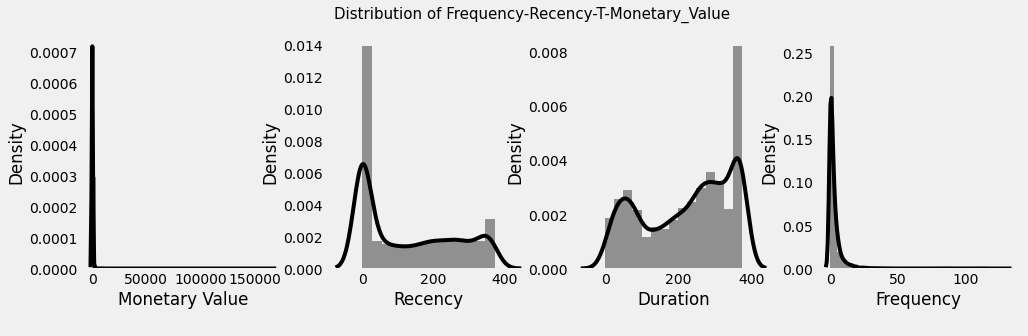

In [ ]:
#  check the Distribution of the Newly Created Features for RFM Analysis

plt.rcParams['figure.figsize'] = (15, 4)
plt.style.use('fivethirtyeight')

plt.subplot(1, 4, 1)
sns.distplot(data['monetary_value'], color = 'black')
plt.xlabel('Monetary Value\n')
plt.grid()

plt.subplot(1, 4, 2)
sns.distplot(data['recency'], color = 'black')
plt.xlabel('Recency\n')
plt.grid()

plt.subplot(1, 4, 3)
sns.distplot(data['T'], color = 'black')
plt.xlabel('Duration\n')
plt.grid()

plt.subplot(1, 4, 4)
sns.distplot(data['frequency'], color = 'black')
plt.xlabel('Frequency\n')
plt.grid()

plt.suptitle('Distribution of Frequency-Recency-T-Monetary_Value \n', fontsize = 15)
plt.show()

Frequency/Recency Analysis
BG-NBD MODEL

In [ ]:
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.1)
bgf.fit(data['frequency'],data['recency'],data['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 4339 subjects, a: 0.00, alpha: 49.41, b: 0.00, r: 0.59>


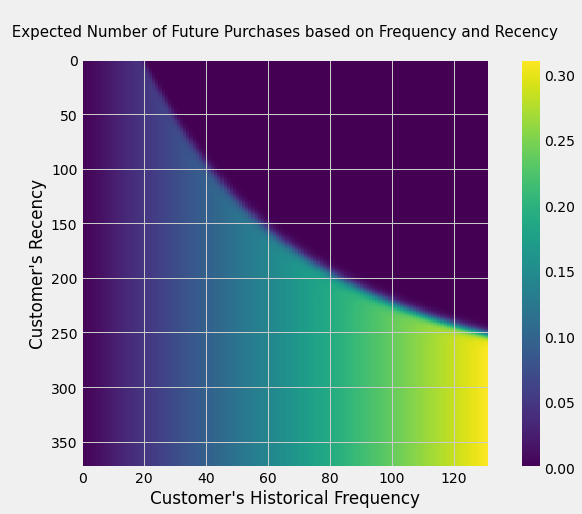

In [ ]:
from lifetimes.plotting import plot_frequency_recency_matrix

plt.rcParams['figure.figsize'] = (10, 7)

# Lets plot the Recency vs Frequency Matrix
plot_frequency_recency_matrix(bgf)
plt.title("\n Expected Number of Future Purchases based on Frequency and Recency \n", fontsize = 15)
plt.show()

**Estimating Customer Liveliness**

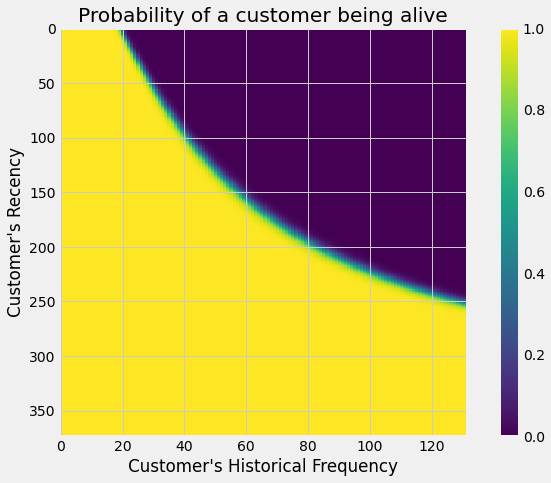

In [ ]:
from lifetimes.plotting import plot_probability_alive_matrix
plt.rcParams['figure.figsize'] = (10, 7)
plot_probability_alive_matrix(bgf)
plt.title("Probability of a customer being alive")
plt.show()

Predicting the purchases of customers for the next time period

In [ ]:
t = 1
data['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, data['frequency'], data['recency'], data['T'])
data.sort_values(by='predicted_purchases').tail(5)

,frequency,recency,T,monetary_value,predicted_purchases
CustomerID,,,,,
14606.0,88.0,372.0,373.0,135.890114,0.209731
15311.0,89.0,373.0,373.0,677.729438,0.212099
17841.0,111.0,372.0,373.0,364.452162,0.264180
12748.0,113.0,373.0,373.0,298.360885,0.268915
14911.0,131.0,372.0,373.0,1093.661679,0.311527


Assessing model fit
 we can predict and we can visualize our customers’ behaviour, but is our model correct? There are a few ways to assess the model’s correctness. The first is to compare your data versus artificial data simulated with your fitted model’s parameters.

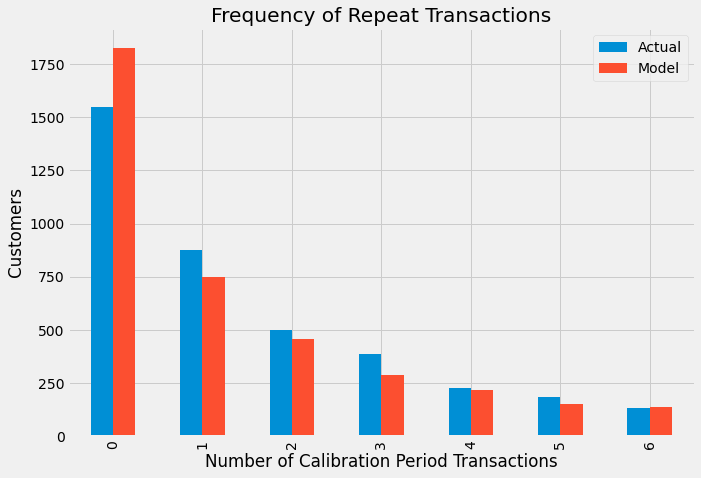

In [ ]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

With transactional data, we can partition the dataset into a calibration period dataset and a holdout dataset. This is important as we want to test how our model performs on data not yet seen (think cross-validation in standard machine learning literature). Lifetimes has a function to partition our dataset like this:


In [ ]:
from lifetimes.utils import calibration_and_holdout_data

#  create the calibration and holdout dataset
summary_cal_holdout = calibration_and_holdout_data(df, 'CustomerID', 'InvoiceDate',
                                        calibration_period_end='2011-06-08',
                                        observation_period_end='2011-12-9' )  

#  check the head of the calibration and holdout dataset
summary_cal_holdout.head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
CustomerID,,,,,
12346.0,0.0,0.0,141.0,0.0,184.0
12347.0,2.0,121.0,183.0,4.0,184.0
12348.0,2.0,110.0,174.0,1.0,184.0
12350.0,0.0,0.0,126.0,0.0,184.0
12352.0,3.0,34.0,112.0,3.0,184.0


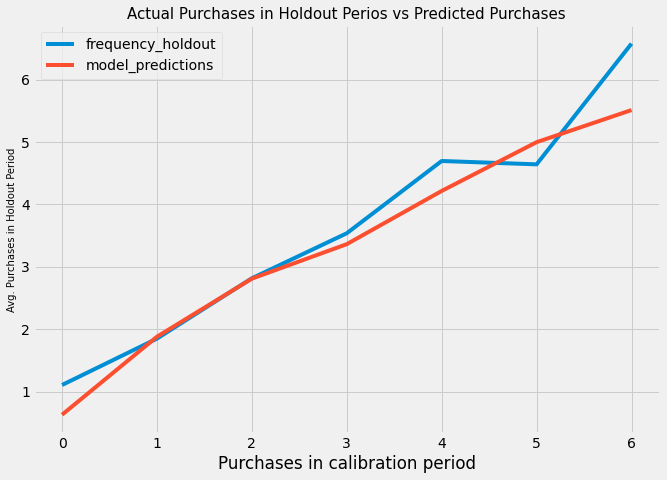

In [ ]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

import warnings
warnings.filterwarnings('ignore')

# lets fit the calibration and holdout data
bgf.fit(summary_cal_holdout['frequency_cal'], 
        summary_cal_holdout['recency_cal'],
        summary_cal_holdout['T_cal'])

# lets plot the Actual Purchases in Holdout Period vs Predicted Purches
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)
plt.ylabel('Avg. Purchases in Holdout Period', fontsize = 10)
plt.title('Actual Purchases in Holdout Perios vs Predicted Purchases', fontsize = 15)
plt.show()

Customer Predictions
Based on customer history, we can predict what an individuals future purchases might look like:



In [ ]:
#  Do a Prediction for the CustomerID NO. 12347
t = 10
individual = data.loc[12347]
print("Purchase Prediction for Customer ID: 12347: ", bgf.predict(t, individual['frequency'], 
                                                individual['recency'], individual['T']))


Purchase Prediction for Customer ID: 12347:  0.15929394518540577


In [ ]:
# Do a Prediction for the CustomerID NO. 12347
t = 10
individual = data.loc[12346]
print("Purchase Prediction for Customer ID: 12347: ", bgf.predict(t, individual['frequency'], 
                                                individual['recency'], individual['T']))


Purchase Prediction for Customer ID: 12347:  0.013746953063125898


In [ ]:
returning_customers_summary = data[data['frequency']>0]

print("\nNumber of Returning Customers :", len(returning_customers_summary))
print('--------------------------------------')
print(returning_customers_summary.head())


Number of Returning Customers : 2790
--------------------------------------
            frequency  recency      T  monetary_value  predicted_purchases
CustomerID                                                                
12347.0           6.0    365.0  367.0      599.701667             0.015834
12348.0           3.0    283.0  358.0      301.480000             0.008820
12352.0           6.0    260.0  296.0      368.256667             0.019089
12356.0           2.0    303.0  325.0      269.905000             0.006927
12358.0           1.0    149.0  150.0      683.200000             0.007991


 Estimating Customer's Lifetime Value
 Predict amount spent per transaction in the future at customer level

In [ ]:
from lifetimes import GammaGammaFitter

#  Make a Model for Gamma Gamma Fitter
ggf = GammaGammaFitter(penalizer_coef = 0)

#  fit the Data onto this Model
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])

# print the Model Coefficients
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 2790 subjects, p: 2.10, q: 3.45, v: 485.57>


In [ ]:
#  Predict the Future Purchases or Customer Lifetime of Our Customers
x = ggf.conditional_expected_average_profit(
        data['frequency'],
        data['monetary_value'])

#  print the Head of the Prediction
print("Customer Lifetime Predictions")
x.head()

Customer Lifetime Predictions


CustomerID
12346.0    416.917667
12347.0    569.988807
12348.0    333.762672
12349.0    416.917667
12350.0    416.917667
dtype: float64